In [1]:
import numpy as np
import pandas as pd

In [2]:
# http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls
all_df = pd.read_excel("titanic3.xls")

In [3]:
all_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
cols = ["survived", "name", "pclass", "sex", "age", "sibsp", "parch", "fare", "embarked"]
all_df = all_df[cols]

In [5]:
all_df.head()

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S
2,0,"Allison, Miss. Helen Loraine",1,female,2.0000,1,2,151.5500,S
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0000,1,2,151.5500,S
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0000,1,2,151.5500,S


In [6]:
all_df[all_df["embarked"].isnull()]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
168,1,"Icard, Miss. Amelie",1,female,38.0,0,0,80.0,NaN
284,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,female,62.0,0,0,80.0,NaN


In [7]:
df = all_df.drop(["name"], axis=1)

In [8]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

In [9]:
# fill the mean value of the column to cells that have Missing value in the column

age_mean = df["age"].mean()
df["age"] = df["age"].fillna(age_mean)

fare_mean = df["fare"].mean()
df["fare"] = df["fare"].fillna(fare_mean)

In [10]:
df["sex"] = df["sex"].map({"female": 0, "male": 1}).astype(int)

In [11]:
x_OneHot_df = pd.get_dummies(data=df, columns=["embarked"])
x_OneHot_df.iloc[168]

survived       1.0
pclass         1.0
sex            0.0
age           38.0
sibsp          0.0
parch          0.0
fare          80.0
embarked_C     0.0
embarked_Q     0.0
embarked_S     0.0
Name: 168, dtype: float64

In [12]:
# turn dataframe to array

ndarray = x_OneHot_df.values
ndarray.shape

(1309, 10)

In [13]:
label = ndarray[:,0]
features = ndarray[:,1:]

In [14]:
label[:2]

array([ 1.,  1.])

In [15]:
features[:2]

array([[   1.    ,    0.    ,   29.    ,    0.    ,    0.    ,  211.3375,
           0.    ,    0.    ,    1.    ],
       [   1.    ,    1.    ,    0.9167,    1.    ,    2.    ,  151.55  ,
           0.    ,    0.    ,    1.    ]])

In [16]:
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
scaledFeatures = minmax_scale.fit_transform(features)
scaledFeatures[:2]

array([[ 0.        ,  0.        ,  0.36116884,  0.        ,  0.        ,
         0.41250333,  0.        ,  0.        ,  1.        ],
       [ 0.        ,  1.        ,  0.00939458,  0.125     ,  0.22222222,
         0.2958059 ,  0.        ,  0.        ,  1.        ]])

In [24]:
# preprocessing

msk = np.random.rand(len(df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]

In [25]:
print("total:", len(all_df), "train:", len(train_df), "test:", len(test_df))

total: 1309 train: 1057 test: 252


In [26]:
def preprocessData(raw_df):
    df = raw_df.drop(["name"], axis=1)
    age_mean = df["age"].mean()
    df["age"] = df["age"].fillna(age_mean)
    fare_mean = df["fare"].mean()
    df["fare"] = df["fare"].fillna(fare_mean)
    df["sex"] = df["sex"].map({"female": 0, "male": 1}).astype(int)
    x_OneHot_df = pd.get_dummies(data=df, columns=["embarked"])
    
    ndarray = x_OneHot_df.values
    label = ndarray[:,0]
    features = ndarray[:,1:]
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
    scaledFeatures = minmax_scale.fit_transform(features)
    
    return scaledFeatures, label

In [27]:
train_features, train_label = preprocessData(train_df)
test_features, test_label = preprocessData(test_df)

In [29]:
train_features[:2]

array([[ 0.        ,  0.        ,  0.35916204,  0.        ,  0.        ,
         0.41250333,  0.        ,  0.        ,  1.        ],
       [ 0.        ,  1.        ,  0.00628273,  0.125     ,  0.22222222,
         0.2958059 ,  0.        ,  0.        ,  1.        ]])

In [30]:
train_label[:2]

array([ 1.,  1.])

In [31]:
# build model

from keras.models import Sequential
from keras.layers import Dense, Dropout

In [34]:
model = Sequential()

model.add(Dense(units=40, input_dim=9, kernel_initializer="uniform", activation="relu"))

model.add(Dense(units=30, kernel_initializer="uniform", activation="relu"))

model.add(Dense(units=1, kernel_initializer="uniform", activation="sigmoid"))

In [35]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 40)                400       
_________________________________________________________________
dense_4 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 1,661
Trainable params: 1,661
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

train_history = model.fit(x=train_features, y=train_label, validation_split=0.1, epochs=30, verbose=2)

Train on 951 samples, validate on 106 samples
Epoch 1/30
 - 0s - loss: 0.6890 - acc: 0.6015 - val_loss: 0.6695 - val_acc: 0.7642
Epoch 2/30
 - 0s - loss: 0.6613 - acc: 0.6067 - val_loss: 0.5678 - val_acc: 0.7642
Epoch 3/30
 - 0s - loss: 0.6100 - acc: 0.6446 - val_loss: 0.5029 - val_acc: 0.7642
Epoch 4/30
 - 0s - loss: 0.5660 - acc: 0.7245 - val_loss: 0.4595 - val_acc: 0.8019
Epoch 5/30
 - 0s - loss: 0.5260 - acc: 0.7792 - val_loss: 0.4488 - val_acc: 0.8019
Epoch 6/30
 - 0s - loss: 0.5060 - acc: 0.7739 - val_loss: 0.4425 - val_acc: 0.8019
Epoch 7/30
 - 0s - loss: 0.4958 - acc: 0.7771 - val_loss: 0.4390 - val_acc: 0.8019
Epoch 8/30
 - 0s - loss: 0.4883 - acc: 0.7750 - val_loss: 0.4359 - val_acc: 0.8208
Epoch 9/30
 - 0s - loss: 0.4837 - acc: 0.7855 - val_loss: 0.4397 - val_acc: 0.8019
Epoch 10/30
 - 0s - loss: 0.4792 - acc: 0.7739 - val_loss: 0.4319 - val_acc: 0.8396
Epoch 11/30
 - 0s - loss: 0.4752 - acc: 0.7739 - val_loss: 0.4312 - val_acc: 0.8491
Epoch 12/30
 - 0s - loss: 0.4726 - acc:

In [37]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel("Epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

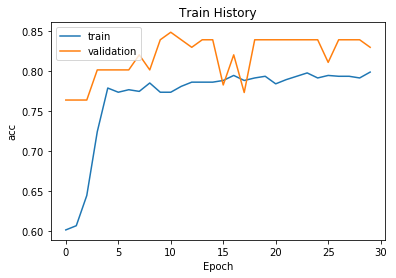

In [38]:
show_train_history(train_history, "acc", "val_acc")

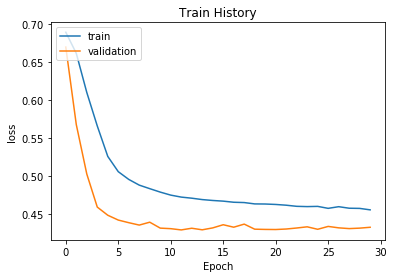

In [39]:
show_train_history(train_history, "loss", "val_loss")

In [40]:
scores = model.evaluate(x=test_features, y=test_label)

252/252 [==============================] - 0s 22us/step


In [41]:
scores[1]

0.80555555366334464

In [43]:
Jack = pd.Series([0, "Jack", 3, "male", 23, 1, 0, 5.0000, "S"])
Rose = pd.Series([1, "Rose", 1, "female", 20, 1, 0, 100.0000, "S"])

JR_df = pd.DataFrame([list(Jack), list(Rose)], columns=["survived", "name", "pclass", "sex", "age", "sibsp", "parch", "fare", "embarked"])

all_df = pd.concat([all_df, JR_df])

In [44]:
all_df[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,0,Jack,3,male,23.0,1,0,5.0,S
1,1,Rose,1,female,20.0,1,0,100.0,S


In [45]:
all_features, label = preprocessData(all_df)

all_probability = model.predict(all_features)

In [46]:
all_probability[:10]

array([[ 0.96858859],
       [ 0.44089216],
       [ 0.96693939],
       [ 0.28301972],
       [ 0.95814145],
       [ 0.25061214],
       [ 0.89588952],
       [ 0.29316765],
       [ 0.88727307],
       [ 0.22301894]], dtype=float32)

In [47]:
pd = all_df
pd.insert(len(all_df.columns), "probability", all_probability)
pd[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,0,Jack,3,male,23.0,1,0,5.0,S,0.130765
1,1,Rose,1,female,20.0,1,0,100.0,S,0.962319


In [48]:
pd[(pd["survived"] == 0) & (pd["probability"] > 0.9)]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
2,0,"Allison, Miss. Helen Loraine",1,female,2.0,1,2,151.5500,S,0.966939
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0,1,2,151.5500,S,0.958141
105,0,"Evans, Miss. Edith Corse",1,female,36.0,0,0,31.6792,C,0.973478
169,0,"Isham, Miss. Ann Elizabeth",1,female,50.0,0,0,28.7125,C,0.967564
